<a href="https://colab.research.google.com/github/ssselderey/SIAOD/blob/main/09_02_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –§–∞–∑–∞ 2 ‚Ä¢ –ù–µ–¥–µ–ª—è 9 ‚Ä¢ –ö–æ–º–ø—å—é—Ç–µ—Ä–Ω–æ–µ –∑—Ä–µ–Ω–∏–µ

## –î–µ—Ç–µ–∫—Ü–∏—è –æ–±—ä–µ–∫—Ç–æ–≤ —Å –ø–æ–º–æ—â—å—é YOLO

In [1]:
# –ï—Å–ª–∏ –Ω—É–∂–µ–Ω GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


–£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏

In [2]:
!pwd

/content


In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 üöÄ v7.0-443-gbe00b6b6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)


Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)


In [4]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
from torchvision.io import read_image

### 1. –ü—Ä–æ—Å—Ç–æ–π –∏–Ω—Ñ–µ—Ä–µ–Ω—Å

–ó–∞–ø—É—Å–∫–∞–µ–º –¥–µ—Ç–µ–∫—Ü–∏—é —Å –ø–æ–º–æ—â—å—é `detect.py` –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è—Ö, –≤–∏–¥–µ–æ –∏–ª–∏ –ø—Ä–æ—á–∏—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–∞—Ö. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω—è—Ç—Å—è –≤ `runs`.
–ü—Ä–∏–º–µ—Ä:
 ```shell
python detect.py --source 0  # –≤–µ–±-–∫–∞–º–µ—Ä–∞
                          img.jpg  # –∫–∞—Ä—Ç–∏–Ω–∫–∞
                          vid.mp4  # –≤–∏–¥–µ–æ
                          screen  # —Å–∫—Ä–∏–Ω—à–æ—Ç
                         'path/*.jpg'  # –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è —Å –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP –ø–æ—Ç–æ–∫–æ–≤–æ–µ –≤–∏–¥–µ–æ
```

In [5]:
# –ü—Ä–∏ —É—Å—Ç–∞–Ω–æ–≤–∫–µ –º–µ–Ω—è–µ—Ç—Å—è –¥–æ–º–∞—à–Ω—è—è –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è.
# –ë—ã–ª–∞ /content/ —Å—Ç–∞–ª–∞ /content/yolov5
!pwd

/content/yolov5


In [ ]:
# —Å–æ–∑–¥–∞–¥–∏–º –ø–∞–ø–∫—É –∏ –∑–∞–≥—Ä—É–∑–∏–º —Ç—É–¥–∞ –ø–∞—Ä—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
!mkdir imgs
!wget -O imgs/image1.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/2880px-Cat_August_2010-4.jpg
!wget -O imgs/image2.jpg https://www.rover.com/blog/wp-content/uploads/2015/08/16063551569_06f5607585_o-960x540.jpg

--2024-10-15 07:50:21--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/2880px-Cat_August_2010-4.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 922105 (900K) [image/jpeg]
Saving to: ‚Äòimgs/image1.jpg‚Äô

imgs/image1.jpg     100%[===================>] 900.49K  --.-KB/s    in 0.03s   

2024-10-15 07:50:21 (25.2 MB/s) - ‚Äòimgs/image1.jpg‚Äô saved [922105/922105]

--2024-10-15 07:50:21--  https://www.rover.com/blog/wp-content/uploads/2015/08/16063551569_06f5607585_o-960x540.jpg
Resolving www.rover.com (www.rover.com)... 104.17.219.168, 104.17.218.168, 104.17.221.168, ...
Connecting to www.rover.com (www.rover.com)|104.17.219.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104345 (102K) [image/jpeg]
Saving to: ‚Äòimgs/image2.jpg‚Äô

In [ ]:
!python /content/yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.5 --source /content/yolov5/imgs/

detect: weights=['yolov5s.pt'], source=/content/yolov5/imgs/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-372-ga3555241 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 274MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ‚ö†Ô∏è NMS time limit 0.550s exceeded
image 1/2 /content/yolov5/imgs/image1.jpg: 416x640 1 cat, 31.8ms
image 2/2 /content/yolov5/imgs/image2.jpg: 384x640 1 cat, 47.6ms
Speed: 0.5ms pre-process, 39.7ms inference, 349.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to ru

In [ ]:
# !pwd

In [ ]:
# home directory = yolov5
path = 'runs/detect/exp'

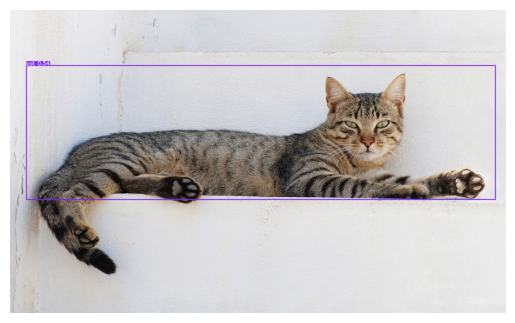

In [ ]:
for i in os.listdir(path):
    plt.imshow((read_image(os.path.join(path, i)).permute(1, 2, 0)))
    plt.axis('off')
    plt.show()

### 2. –û–±—É—á–µ–Ω–∏–µ –Ω–∞ —Å–≤–æ–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

 1. –†–∞–∑–º–µ—á–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ roboflow –∏ —Å–∫–∞—á–∏–≤–∞–µ–º –µ–≥–æ –∫ —Å–µ–±–µ.
 2. –ó–∞–ø—É—Å–∫–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ!

In [1]:
# https://universe.roboflow.com/cv-project-ggmi2/dog-breeds-ggciv/dataset/5/download
!pip install roboflow

!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="LpBvn3sYqgJUrhG1yKv2")
project = rf.workspace("narana-van").project("my-first-project-49ipc")
version = project.version(1)
dataset = version.download("yolov5")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 89.9/89.9 kB 9.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 49.9/49.9 MB 14.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 94.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.2/4.2 MB 114.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-h


Extracting Dataset Version Zip to My-First-Project-1 in yolov5pytorch:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 354/354 [00:00<00:00, 4991.37it/s]


In [6]:
!ls data

Argoverse.yaml	      hyps		 images		  VOC.yaml
coco128-seg.yaml      ImageNet1000.yaml  Objects365.yaml  xView.yaml
coco128.yaml	      ImageNet100.yaml	 scripts
coco.yaml	      ImageNet10.yaml	 SKU-110K.yaml
GlobalWheat2020.yaml  ImageNet.yaml	 VisDrone.yaml


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
# Train!
!python train.py --img 640 --batch 16 --epochs 10 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache


wandb: WARNING ‚ö†Ô∏è wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-28 11:53:44.852830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761652424.872255    3701 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761652424.878171    3701 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761652424.893235    3701 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761652424.893269    3701 computation_placer.cc:177] computation placer already regis

In [8]:
!ls /content
!ls /content/yolov5


My-First-Project-1  sample_data  yolov5
benchmarks.py	 detect.py   __pycache__       runs	       val.py
CITATION.cff	 export.py   pyproject.toml    segment
classify	 hubconf.py  README.md	       train.py
CONTRIBUTING.md  LICENSE     README.zh-CN.md   tutorial.ipynb
data		 models      requirements.txt  utils


In [11]:
!ls /content/My-First-Project-1


data.yaml  README.dataset.txt  README.roboflow.txt  train


In [12]:
# —Å–æ–∑–¥–∞—ë–º –ø–∞–ø–∫–∏ valid/images –∏ valid/labels
!mkdir -p /content/My-First-Project-1/valid/images
!mkdir -p /content/My-First-Project-1/valid/labels

# –∫–æ–ø–∏—Ä—É–µ–º ~20% –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏
!bash -c 'ls /content/My-First-Project-1/train/images | head -n 10 | xargs -I{} cp /content/My-First-Project-1/train/images/{} /content/My-First-Project-1/valid/images/'
!bash -c 'ls /content/My-First-Project-1/train/labels | head -n 10 | xargs -I{} cp /content/My-First-Project-1/train/labels/{} /content/My-First-Project-1/valid/labels/'


In [13]:
!cat /content/My-First-Project-1/data.yaml


names:
- objects
nc: 1
roboflow:
  license: CC BY 4.0
  project: my-first-project-49ipc
  url: https://universe.roboflow.com/narana-van/my-first-project-49ipc/dataset/1
  version: 1
  workspace: narana-van
test: ../test/images
train: My-First-Project-1/train/images
val: My-First-Project-1/valid/images


In [14]:
%%writefile /content/My-First-Project-1/data.yaml
train: /content/My-First-Project-1/train/images
val: /content/My-First-Project-1/valid/images

nc: 1
names: ['car']


Overwriting /content/My-First-Project-1/data.yaml


In [16]:
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 10 --data /content/My-First-Project-1/data.yaml --weights yolov5s.pt --cache


/content/yolov5
wandb: WARNING ‚ö†Ô∏è wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-28 12:05:22.536764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761653122.560040    6638 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761653122.566024    6638 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761653122.581921    6638 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761653122.581957    6638 computation_placer.cc:177] computation plac

In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17639, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 17639 (delta 11), reused 8 (delta 8), pack-reused 17601 (from 3)
Receiving objects: 100% (17639/17639), 16.96 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (11987/11987), done.
/content/yolov5
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 63.3 MB/s eta 0:00:00


In [20]:
!ls /content/yolov5/runs/train/exp2/weights/


best.pt  last.pt


In [21]:
!python /content/yolov5/detect.py \
  --weights /content/yolov5/runs/train/exp2/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/My-First-Project-1/train/images

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/My-First-Project-1/train/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-443-gbe00b6b6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/174 /content/My-First-Project-1/train/images/025e7d85100d97633f534d30562c67a9_jpg.rf.5e4aaaa13614e2499b145dab46b2036c.jpg: 640x640 (no detections), 11.4ms
image 2/174 /content/My-First-Project-1/train/images/025e7d85100d97633f534d30562c67a9_jpg.rf.baaa641fa220ab0a1

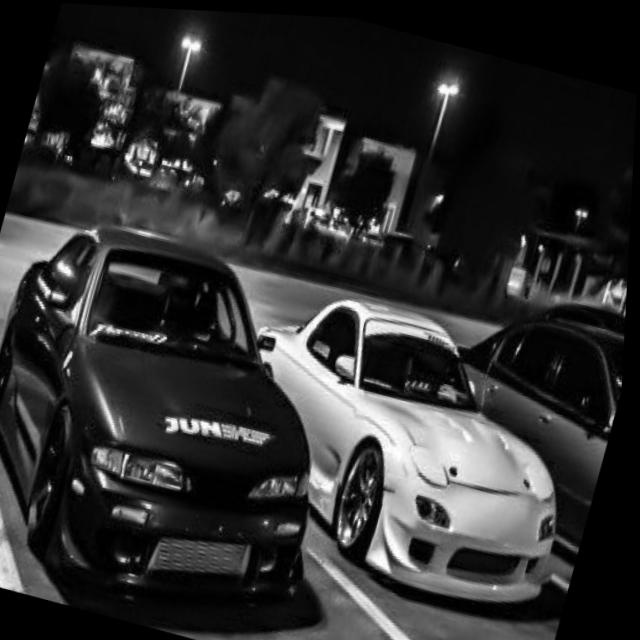

In [23]:
from IPython.display import Image, display
display(Image(filename='/content/yolov5/runs/detect/exp/025e7d85100d97633f534d30562c67a9_jpg.rf.5e4aaaa13614e2499b145dab46b2036c.jpg'))

In [33]:
!python /content/yolov5/detect.py \
  --weights /content/yolov5/runs/train/exp2/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /content/My-First-Project-1/train/images/3332bd864e761609142c90f5674123ff_jpg.rf.9207d43b507694d33f9b25679f385cc1.jpg



detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/My-First-Project-1/train/images/3332bd864e761609142c90f5674123ff_jpg.rf.9207d43b507694d33f9b25679f385cc1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-443-gbe00b6b6 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/My-First-Project-1/train/images/3332bd864e761609142c90f5674123ff_jpg.rf.9207d43b507694d33f9b25679f385cc1.jpg: 640x640 1 car, 11.4ms
Speed: 0.6ms pre-process, 11.4ms inference, 1

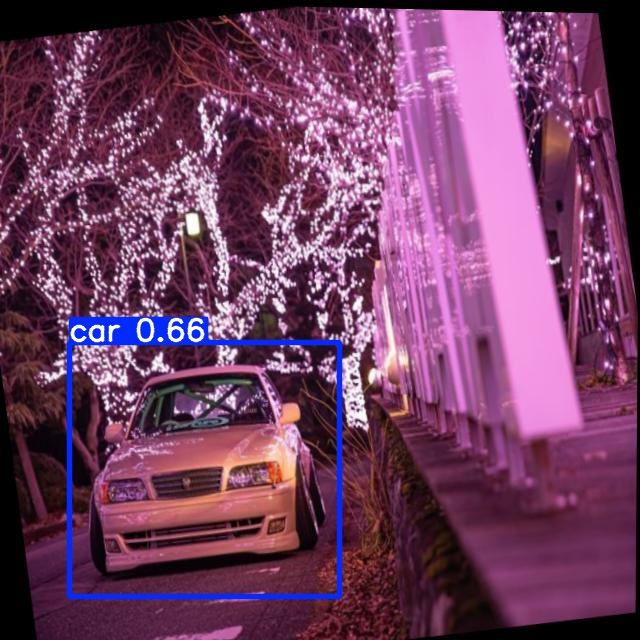

In [34]:
from IPython.display import Image, display
display(Image(filename='/content/yolov5/runs/detect/exp5/3332bd864e761609142c90f5674123ff_jpg.rf.9207d43b507694d33f9b25679f385cc1.jpg'))


1. –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –±—É–¥—É—Ç —Å–æ—Ö—Ä–∞–Ω—è—Ç—å—Å—è –≤ –ø–∞–ø–∫—É `yolov5/runs`, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –ø–æ –¥—Ä—É–≥–æ–º—É –ø—É—Ç–∏, –º–æ–∂–Ω–æ –≤ –∫–ª—é—á–∏ –¥–æ–±–∞–≤–∏—Ç—å –ø—É—Ç—å –∫ –ø–∞–ø–∫—É, –∫—É–¥–∞ —Ö–æ—Ç–∏–º —Å–æ—Ö—Ä–∞–Ω—è—Ç—å. –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –ø–æ–¥–∫–ª—é—á–µ–Ω GoogleDrive:

    ```
    --name /content/drive/MyDrive/yolo_demo
    ```

    –¢–æ–≥–¥–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –±—É–¥—É—Ç —Å–æ—Ö—Ä–∞–Ω—è—Ç—å—Å—è –Ω–∞ GoogleDrive –≤ –ø–∞–ø–∫—É `yolo_demo`. –°–æ–∑–¥–∞–≤–∞—Ç—å –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ —ç—Ç—É –ø–∞–ø–∫—É –Ω–µ –Ω—É–∂–Ω–æ: —Å–∫—Ä–∏–ø—Ç —Å–∞–º —Å–æ–∑–¥–∞—Å—Ç –µ—ë.

2. –ò–º–µ—è —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–µ –≤–µ—Å–∞ –º–æ–∂–Ω–æ **–ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å** –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏: –Ω—É–∂–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å –∞—Ä–≥—É–º–µ–Ω—Ç `weights`:

    ```
    --weights /path/to/your/weights.pt
    ```

### –ò–Ω—Ñ–µ—Ä–µ–Ω—Å —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏

In [ ]:
!pwd

/content/yolov5


In [ ]:
model = torch.hub.load(
    # –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –ª–æ–∫–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª—å—é –≤ —Ç–µ–∫—É—â–µ–π –ø–∞–ø–∫–µ
    repo_or_dir = '.',
    # –Ω–µ–ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–∞—è ‚Äì –±—É–¥–µ–º –ø–æ–¥—Å—Ç–∞–≤–ª—è—Ç—å —Å–≤–æ–∏ –≤–µ—Å–∞
    model = 'custom',
    # –ø—É—Ç—å –∫ –Ω–∞—à–∏–º –≤–µ—Å–∞–º
    path='/content/yolov5/runs/train/exp/weights/best.pt',
    # –æ—Ç–∫—É–¥–∞ –±–µ—Ä–µ–º –º–æ–¥–µ–ª—å ‚Äì –Ω–∞—à–∞ –ª–æ–∫–∞–ª—å–Ω–∞—è
    source='local'
    )

YOLOv5 üöÄ v7.0-372-ga3555241 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


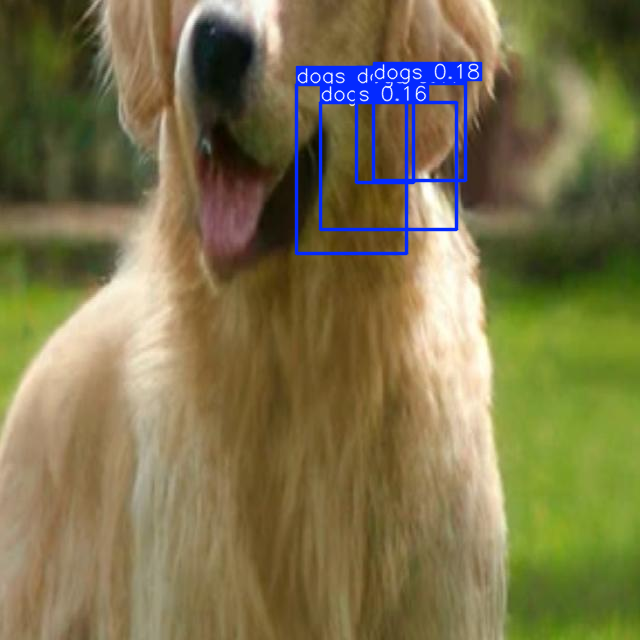

In [ ]:
import torchvision.transforms as T
# –ù–∞—á–∏–Ω–∞—è —Å –∫–∞–∫–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—Ç—Ä–∏—Å–æ–≤—ã–≤–∞—Ç—å –¥–µ—Ç–µ–∫—Ü–∏–∏
model.conf = 0.9
# –ß–∏—Ç–∞–µ–º –∫–∞—Ä—Ç–∏–Ω–∫—É
img = T.ToPILImage()(read_image('/content/yolov5/golden-2/test/images/SCR-20240402-nkut_jpeg.rf.caa3f1258daccf7195b63dbb4cdce864.jpg'))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()